In [10]:
import json
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#from wordcloud import WordCloud
from PIL import Image

from transformers import AutoTokenizer

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 경로 지정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [12]:
# LLaMA-3 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("MLP-KTLim/llama-3-Korean-Bllossom-8B")

In [13]:
# JSON 파일 경로
file_path = r'data\preprocessed.json'

# JSON 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 데이터프레임으로 변환
df = pd.DataFrame(data)
df.head()

,source,title,content
0,경기도외국인지원센터_상담사례,중도 퇴사 후 근로소득 신고되지 않아 고용허가연장 안된 노동자 지원,작성일: 23-11-27\n상담유형: 체류자격\n거주지역: 여주시\n국적: 우즈베키...
1,경기도외국인지원센터_상담사례,국민연금 반환일시금 신청 지원,작성일: 23-11-27\n상담유형: 기타\n거주지역: 남양주시\n국적: 필리핀\n...
2,경기도외국인지원센터_상담사례,외국인아동 교육권 보장을 위한 체류자격 부여자(G-1-85) 외국인등록 절차 지원,작성일: 23-11-27\n상담유형: 체류자격\n거주지역: 남양주시\n국적: 필리핀...
3,경기도외국인지원센터_상담사례,단체행동을 통해 체불임금 해결한 사례,작성일: 23-11-27\n상담유형: 임금체불\n거주지역: 안산시\n국적: 필리핀\...
4,경기도외국인지원센터_상담사례,취업가능기간이 짧게 남아 취업이 어려운 노동자 구직활동 지원,작성일: 23-11-27\n상담유형: 고용허가\n거주지역: 시흥시\n국적: 필리핀\...



=== 경기도외국인지원센터_상담사례 분석 (LLaMA-3 토큰 기준) ===
텍스트 수: 1700
평균 토큰 수: 623.38
최대 토큰 수: 3884
최소 토큰 수: 158


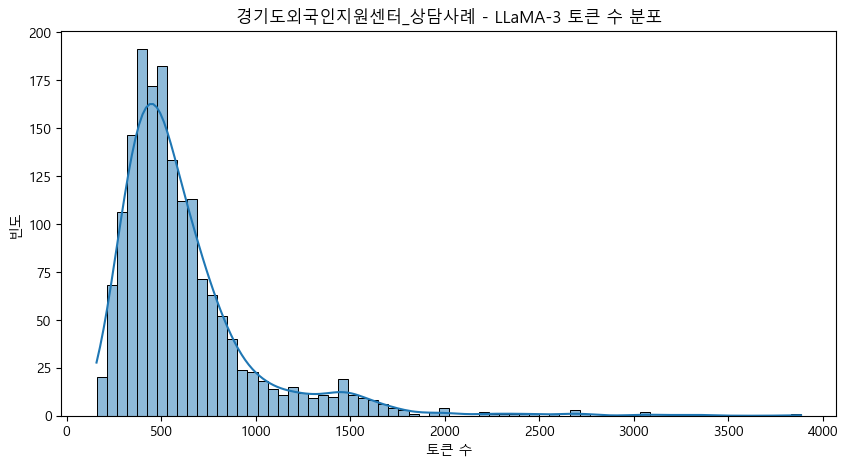


가장 긴 텍스트 (토큰 수: 3884):
작성일: 16-02-22
상담유형: 부당해고
거주지역: 인천
국적: 캄보디아
체류자격: E-9
상담내용: 캄보디아 출신 M과 N(E-9)은 3년의 근로계약을 체결하고 인천의 문구제...

가장 짧은 텍스트 (토큰 수: 158):
작성일: 22-10-28
상담유형: 기타
거주지역: 남양주시
국적: 캄보디아
체류자격: F-2
상담내용: 캄보디아에 있는 아들(5세)을 한국으로 데려 옴
 어린이집에 보내기를 원해서 어린이집을 연결해줌
진행 과정 및 결과: 9월26일
남양주시 S어린이집 방문하여 입학 상담

9월27일
S어린이집 방문하여 어린이집 등록 원서 작성

9월28일
내담자의 자녀 어린이집 등원 시작
상담지원단체: 남양주온누리M센터

토큰 수 구간별 텍스트 수:
0-128          0
129-256       69
257-512      757
513-1024     698
1025-2048    159
2049-4096     17
4096+          0
Name: count, dtype: int64


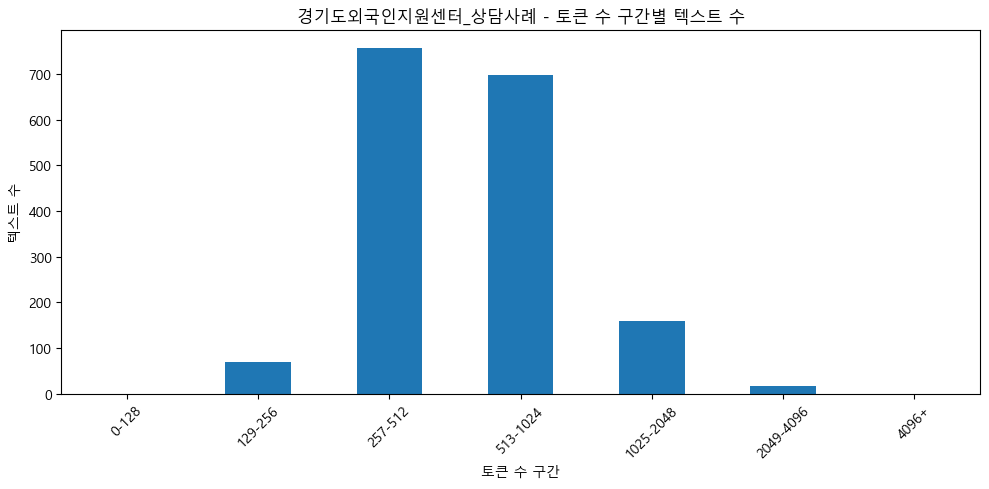


=== 법무부 외국인 체류관리 분석 (LLaMA-3 토큰 기준) ===
텍스트 수: 12
평균 토큰 수: 358.75
최대 토큰 수: 910
최소 토큰 수: 124


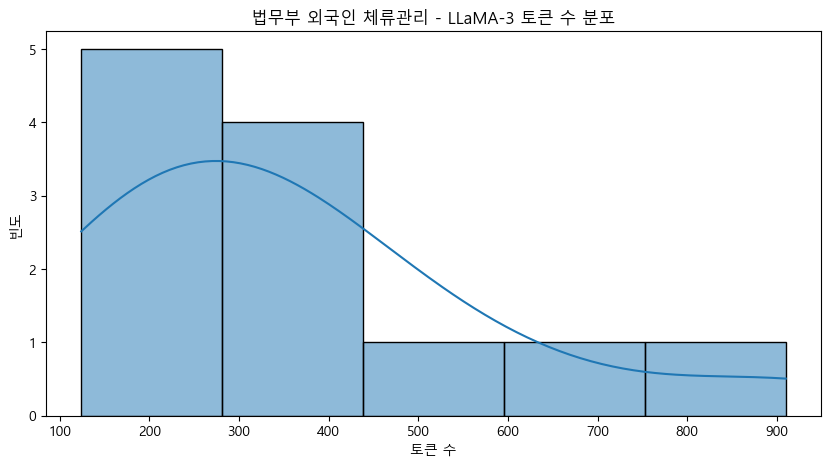


가장 긴 텍스트 (토큰 수: 910):
category: 재외동포 포용정책
text:
재외동포의 인정범위 확대 및 사회통합 강화2017년에는 4세대 이후 고려인동포 등이 재외동포로 인정받지 못하여 국내 체류하는 부모와 ...

가장 짧은 텍스트 (토큰 수: 124):
category: 계절근로자 제도
text:
농‧어촌의 고질적인 인력부족 문제를 해소하기 위하여 관계부처와 협업하여 2015년 10월부터 ‘외국인 계절근로자 제도’를 도입･운영하고 있습니다.
‘외국인 계절근로자 제도’란 계절적 수요에 따라 일손이 집중적으로 필요한 농‧어번기에 외국인을 단기간(최대 8개월까지) 탄력적으로 고용할 수 있는 제도입니다.

토큰 수 구간별 텍스트 수:
0-128        2
129-256      3
257-512      5
513-1024     2
1025-2048    0
2049-4096    0
4096+        0
Name: count, dtype: int64


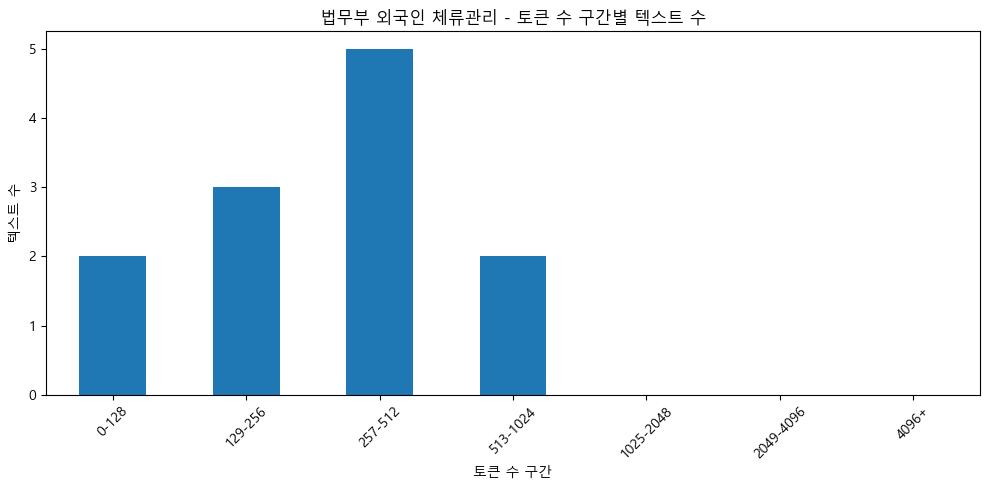


=== easylaw_kr 분석 (LLaMA-3 토큰 기준) ===
텍스트 수: 346
평균 토큰 수: 162.35
최대 토큰 수: 1247
최소 토큰 수: 45


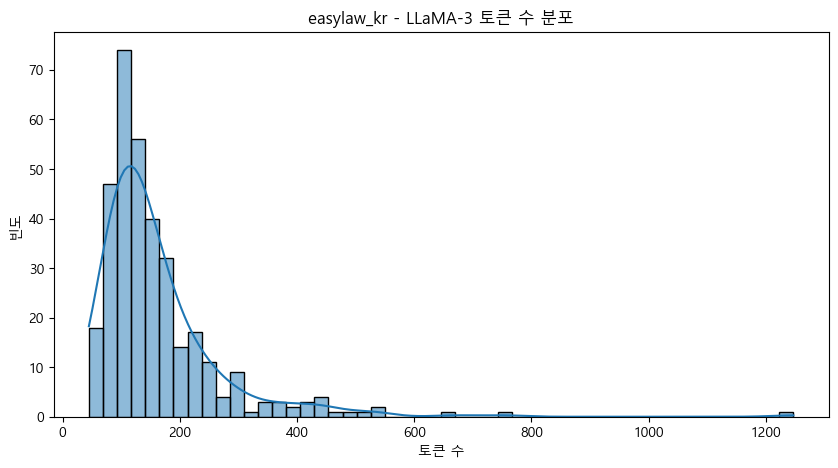


가장 긴 텍스트 (토큰 수: 1247):
질문: 장애인이 이용할 자동차에 대한 세금 혜택은 어떤 것들이 있으며, 장애인이 사용하는 모든 자동차는 세금 해택을 받을 수 있는 건가요?
답변: ◇ 승용자동차에 대한 개별소비세 ...

가장 짧은 텍스트 (토큰 수: 45):
질문: 퇴직금은 어떤 방식으로 산정하나요?
답변: 고용주는 퇴직하는 근로자에게 평균임금을 퇴직금으로 지급해야 합니다.

토큰 수 구간별 텍스트 수:
0-128        171
129-256      135
257-512       34
513-1024       5
1025-2048      1
2049-4096      0
4096+          0
Name: count, dtype: int64


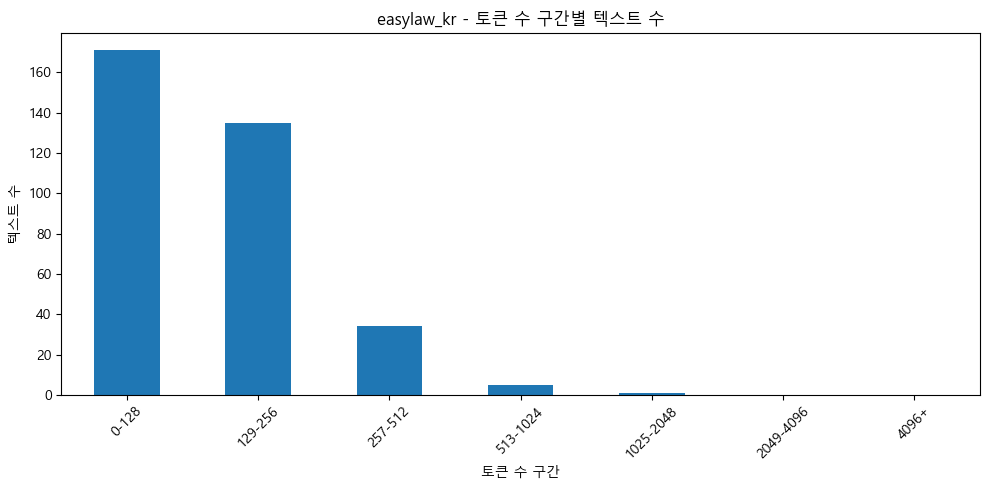


=== legalqa 분석 (LLaMA-3 토큰 기준) ===
텍스트 수: 224
평균 토큰 수: 917.05
최대 토큰 수: 2619
최소 토큰 수: 182


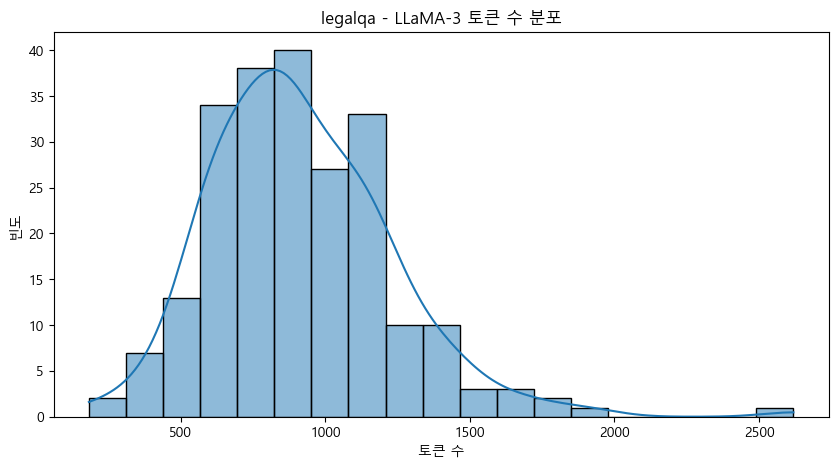


가장 긴 텍스트 (토큰 수: 2619):
질문: 저는 같은 동네에 살고 있는 소유의 밭 605평을 임차하여 마늘과 고추 등을 재배하면서 그 수확물의 일부를 지료()로 지급하고 있었습니다. 그런데 소유의 밭이 도로로 수용되...

가장 짧은 텍스트 (토큰 수: 182):
질문: 저는 중국 국적의 조선족으로 한국에서 식당일을 하고 있는데, 제가 지금 전세로 살고 있는 집에 대해서 어떤 보호를 받을 수 있나요?
답변: (1) 외국인의 경우 출입국관리법에 의한 외국인등록 및 체류지변경신고를 하였다면, 주택임대차보호법 제3조제1항 소정의 주민등록으로 볼 수 있습니다(출입국관리법 제88조의2제2항).
  (2) 외국국적을 취득한 한국동포, 즉 재외동포의 경우에는 ‘재외동포의 출입국과 법적지위에 관한 법률’에 의한 국내거소신고를 주택임대차보호법 소정의 주민등록으로 볼 수 있습니다.

토큰 수 구간별 텍스트 수:
0-128          0
129-256        2
257-512        9
513-1024     138
1025-2048     74
2049-4096      1
4096+          0
Name: count, dtype: int64


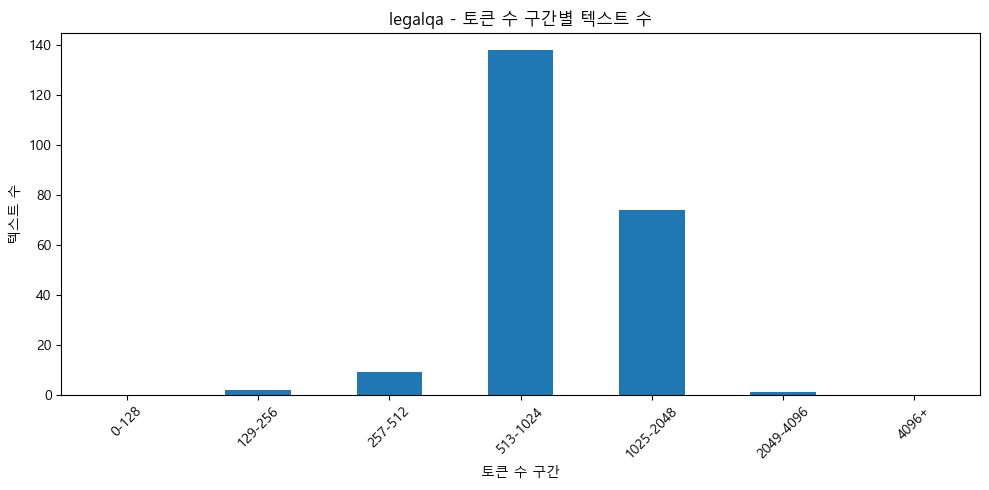


=== 대한법률구조공단_상담사례 분석 (LLaMA-3 토큰 기준) ===
텍스트 수: 1151
평균 토큰 수: 729.51
최대 토큰 수: 3421
최소 토큰 수: 155


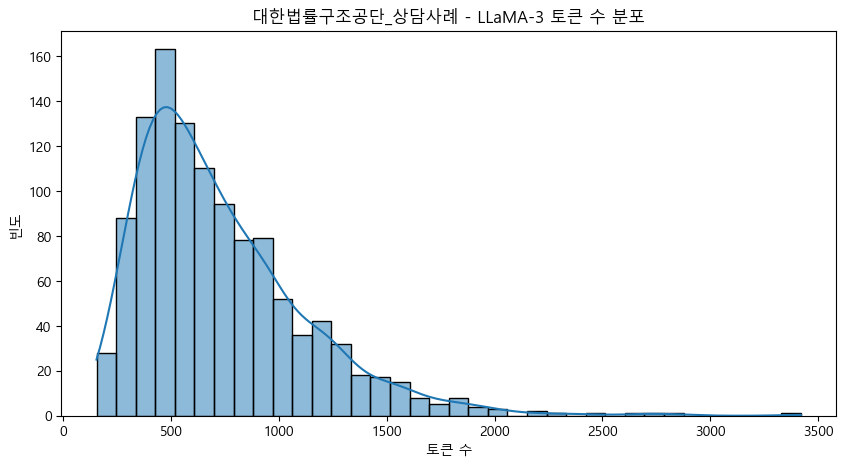


가장 긴 텍스트 (토큰 수: 3421):
카테고리: 행정 - 부동산 관련 행정
질문: 저는 같은 동네에 살고 있는 소유의 밭 605평을 임차하여 마늘과 고추 등을 재배하면서 그 수확물의 일부를 지료()로 지급하고 있었습니...

가장 짧은 텍스트 (토큰 수: 155):
카테고리: 노동 - 근로일반
질문: 근로기준법상 근로자에는 정규직만 들어가는 건가요?
답변: 계약직, 파견직도 근로기준법이 적용되며 그 외에 기간제 및 단시간 근로자보호 등에 관한 법률과 파견근로자에 관한 법률 등이 추가적으로 적용됩니다.


※ 주의 : 사례에 대한 답변은 법령이나 판례 등의 변경으로 내용이 바뀔 수 있으므로 구체적인 사안에 대해서는 반드시 대한법률구조공단 상담(전화상담은 국번없이 ☎ 132) 등을 통해 다시 한 번 확인하시기 바랍니다.

토큰 수 구간별 텍스트 수:
0-128          0
129-256       35
257-512      369
513-1024     532
1025-2048    206
2049-4096      9
4096+          0
Name: count, dtype: int64


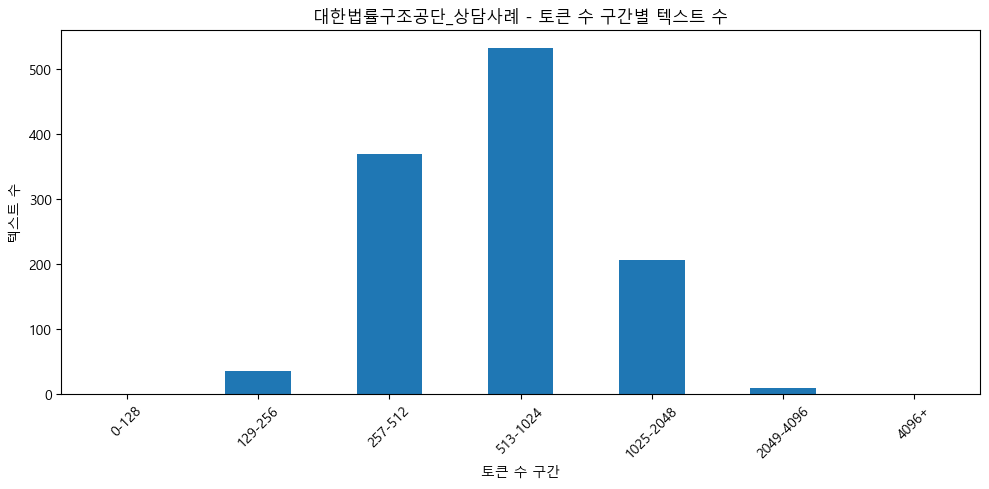

In [14]:
# 데이터프레임 로드 (이전에 만든 df 사용)
# df = pd.read_json('your_data.json')

def analyze_title_llama3(df, title="전체 데이터"):
    print(f"\n=== {title} 분석 (LLaMA-3 토큰 기준) ===")

    titles = df['source'].unique()
    if title not in titles :
        texts = df['content']
    else :
        texts = df[df['source'] == title]['content']
    
    # 토큰 수 계산
    token_counts = [len(tokenizer.tokenize(text)) for text in texts]
    
    print(f"텍스트 수: {len(texts)}")
    print(f"평균 토큰 수: {np.mean(token_counts):.2f}")
    print(f"최대 토큰 수: {max(token_counts)}")
    print(f"최소 토큰 수: {min(token_counts)}")
    
    # 토큰 수 분포 시각화
    plt.figure(figsize=(10, 5))
    sns.histplot(token_counts, kde=True)
    plt.title(f'{title} - LLaMA-3 토큰 수 분포')
    plt.xlabel('토큰 수')
    plt.ylabel('빈도')
    plt.show()
    
    # 가장 긴 텍스트와 가장 짧은 텍스트 출력
    longest_text = texts.iloc[np.argmax(token_counts)]
    shortest_text = texts.iloc[np.argmin(token_counts)]
    
    print(f"\n가장 긴 텍스트 (토큰 수: {max(token_counts)}):")
    print(longest_text[:100] + "..." if len(longest_text) > 100 else longest_text)
    
    print(f"\n가장 짧은 텍스트 (토큰 수: {min(token_counts)}):")
    print(shortest_text)
    
    # 토큰 수 구간별 텍스트 수 계산
    bins = [0, 128, 256, 512, 1024, 2048, 4096, float('inf')]
    labels = ['0-128', '129-256', '257-512', '513-1024', '1025-2048', '2049-4096', '4096+']
    token_ranges = pd.cut(token_counts, bins=bins, labels=labels, include_lowest=True)
    range_counts = token_ranges.value_counts().sort_index()
    
    print("\n토큰 수 구간별 텍스트 수:")
    print(range_counts)
    
    # 토큰 수 구간별 텍스트 수 시각화
    plt.figure(figsize=(10, 5))
    range_counts.plot(kind='bar')
    plt.title(f'{title} - 토큰 수 구간별 텍스트 수')
    plt.xlabel('토큰 수 구간')
    plt.ylabel('텍스트 수')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 각 타이틀에 대해 분석 수행
titles = df['source'].unique()
for title in titles:
    analyze_title_llama3(df, title)

In [24]:
#전처리X
merge_file_path = r'data\merged.json'
with open(merge_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

merged_df = pd.DataFrame(data)


=== 기존 데이터 분석 (LLaMA-3 토큰 기준) ===
텍스트 수: 3433
평균 토큰 수: 645.75
최대 토큰 수: 3920
최소 토큰 수: 45


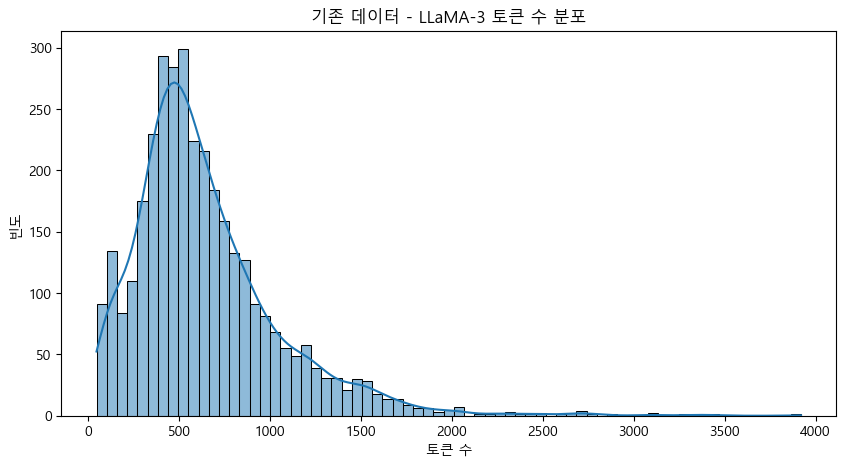


가장 긴 텍스트 (토큰 수: 3920):
작성일: 16-02-22
상담유형: 부당해고
거주지역: 인천
국적: 캄보디아
체류자격: E-9
상담내용: 캄보디아 출신 M과 N(E-9)은 3년의 근로계약을 체결하고 인천의 문구제...

가장 짧은 텍스트 (토큰 수: 45):
질문: 퇴직금은 어떤 방식으로 산정하나요?
답변: 고용주는 퇴직하는 근로자에게 평균임금을 퇴직금으로 지급해야 합니다.


토큰 수 구간별 텍스트 수:
0-128         170
129-256       207
257-512      1127
513-1024     1437
1025-2048     464
2049-4096      28
4096+           0
Name: count, dtype: int64


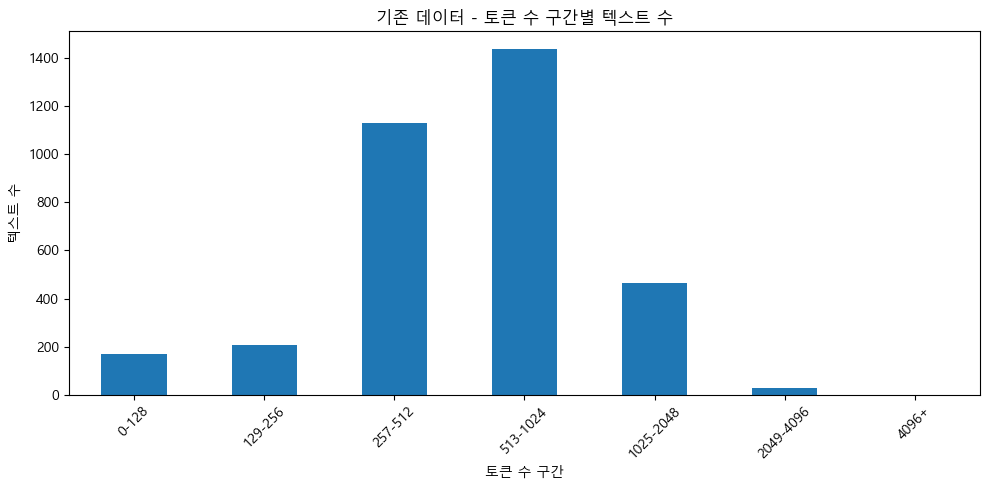

In [25]:
analyze_title_llama3(merged_df, title="기존 데이터")

In [26]:
#전처리완
preprocessed_file_path = r'data\preprocessed.json'
with open(preprocessed_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

preprocessed_df = pd.DataFrame(data)


=== 전처리 데이터 분석 (LLaMA-3 토큰 기준) ===
텍스트 수: 3433
평균 토큰 수: 630.73
최대 토큰 수: 3884
최소 토큰 수: 45


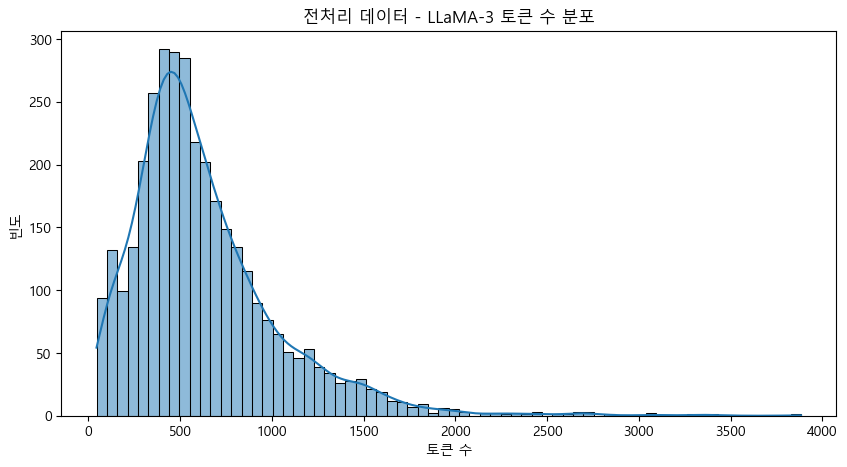


가장 긴 텍스트 (토큰 수: 3884):
작성일: 16-02-22
상담유형: 부당해고
거주지역: 인천
국적: 캄보디아
체류자격: E-9
상담내용: 캄보디아 출신 M과 N(E-9)은 3년의 근로계약을 체결하고 인천의 문구제...

가장 짧은 텍스트 (토큰 수: 45):
질문: 퇴직금은 어떤 방식으로 산정하나요?
답변: 고용주는 퇴직하는 근로자에게 평균임금을 퇴직금으로 지급해야 합니다.

토큰 수 구간별 텍스트 수:
0-128         173
129-256       244
257-512      1174
513-1024     1375
1025-2048     440
2049-4096      27
4096+           0
Name: count, dtype: int64


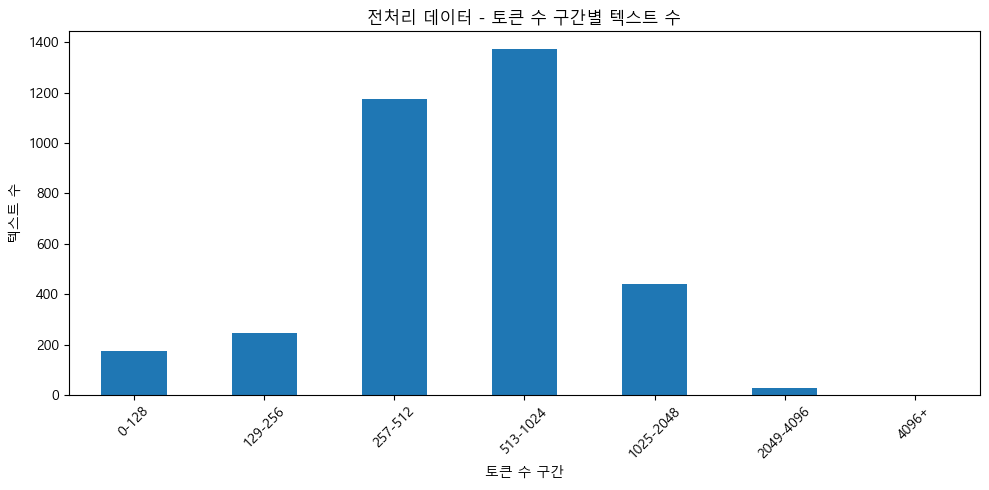

In [27]:
analyze_title_llama3(preprocessed_df, title="전처리 데이터")

### 글자 수 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from konlpy.tag import Okt
import numpy as np

okt = Okt()

def analyze_title(df, title):
    print(f"\n=== {title} 분석 ===")
    
    # 1. 기본 통계
    texts = df[df['title'] == title]['content']
    print(f"텍스트 수: {len(texts)}")
    
    # # 2. 텍스트 길이 분석
    # text_lengths = texts.str.len()
    # print(f"평균 텍스트 길이: {text_lengths.mean():.2f}")
    # print(f"최대 텍스트 길이: {text_lengths.max()}")
    # print(f"최소 텍스트 길이: {text_lengths.min()}")
    
    # # 텍스트 길이 분포 시각화
    # plt.figure(figsize=(10, 5))
    # sns.histplot(text_lengths, kde=True)
    # plt.title(f'{title} - 텍스트 길이 분포')
    # plt.xlabel('텍스트 길이')
    # plt.ylabel('빈도')
    # plt.show()
    
    # 3. 가장 많이 사용된 단어 분석
    all_words = []
    for text in texts:
        words = okt.nouns(text) #명사만 분석
        all_words.extend([word for word in words if len(word) > 1])
    
    word_freq = Counter(all_words)
    top_words = word_freq.most_common(10)
    
    print("\n가장 많이 사용된 단어 (상위 10개):")
    for word, count in top_words:
        print(f"{word}: {count}")
    
    # 상위 단어 시각화
    plt.figure(figsize=(10, 5))
    sns.barplot(x=[word for word, _ in top_words], y=[count for _, count in top_words])
    plt.title(f'{title} - 가장 많이 사용된 단어 (상위 10개)')
    plt.xlabel('단어')
    plt.ylabel('빈도')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 각 타이틀에 대해 분석 수행
titles = df['source'].unique()

# 각 타이틀에 대해 분석 수행
for title in titles:
    analyze_title(df, title)

ModuleNotFoundError: No module named 'konlpy'

### 출처별 평균 토큰 길이, 출처별 데이터 크기

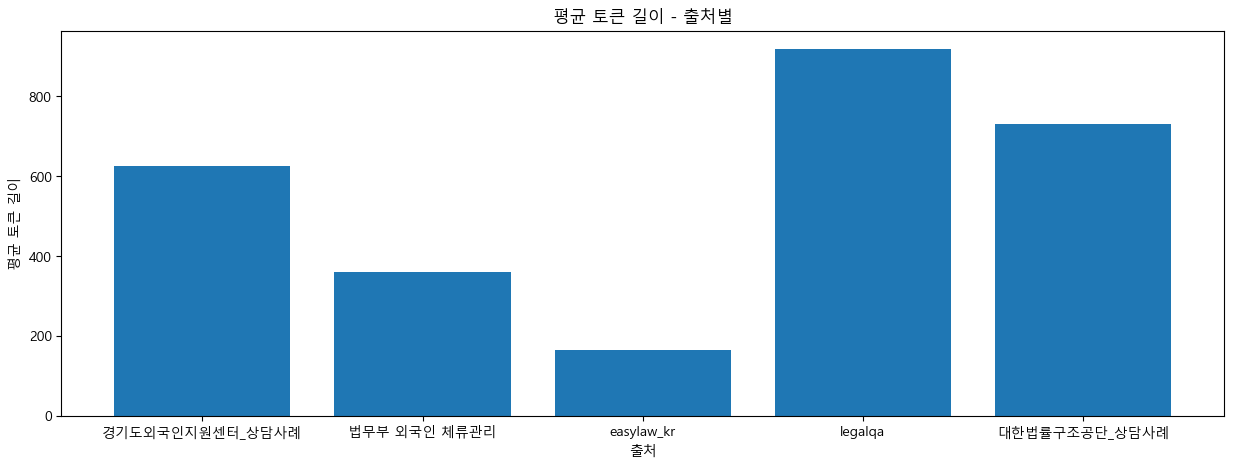

<Figure size 640x480 with 0 Axes>

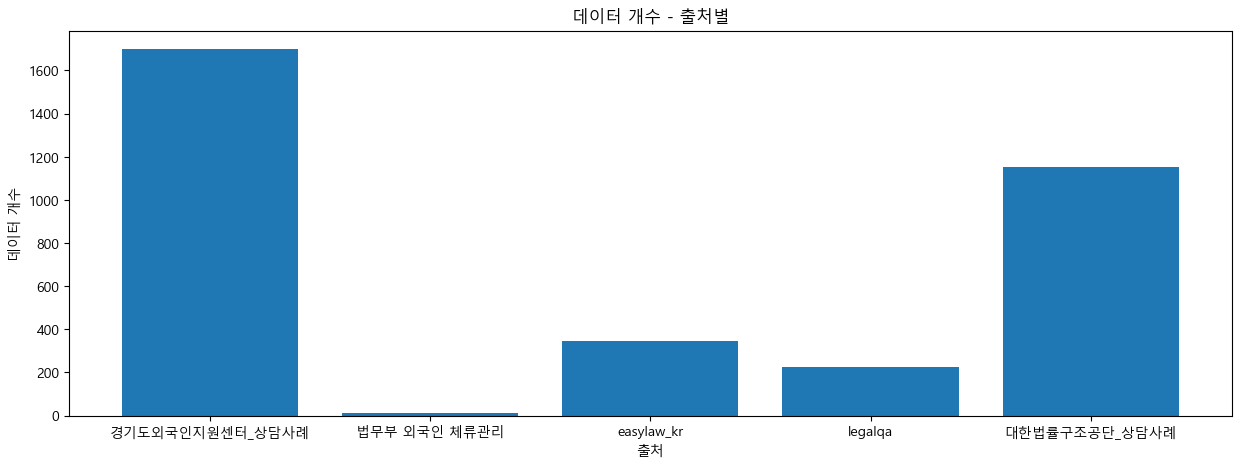

경기도외국인지원센터_상담사례:
  평균 토큰 길이: 624.38
  최소 토큰 길이: 159
  최대 토큰 길이: 3885
  데이터 수: 1700

법무부 외국인 체류관리:
  평균 토큰 길이: 359.75
  최소 토큰 길이: 125
  최대 토큰 길이: 911
  데이터 수: 12

easylaw_kr:
  평균 토큰 길이: 163.35
  최소 토큰 길이: 46
  최대 토큰 길이: 1248
  데이터 수: 346

legalqa:
  평균 토큰 길이: 918.05
  최소 토큰 길이: 183
  최대 토큰 길이: 2620
  데이터 수: 224

대한법률구조공단_상담사례:
  평균 토큰 길이: 730.51
  최소 토큰 길이: 156
  최대 토큰 길이: 3422
  데이터 수: 1151



<Figure size 640x480 with 0 Axes>

In [19]:
import json

# JSON 파일 경로
file_path = r'data\preprocessed.json'

# JSON 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 카테고리별 토큰 길이 계산
category_tokens = {}
for item in data:
    category = item['source']
    content = item['content']
    tokens = tokenizer.encode(content)
    if category not in category_tokens:
        category_tokens[category] = []
    category_tokens[category].append(len(tokens))

# 데이터 시각화
categories = list(category_tokens.keys())
token_lengths = [sum(lengths) / len(lengths) for lengths in category_tokens.values()]

plt.figure(figsize=(15, 5))
plt.bar(categories, token_lengths)
plt.title('평균 토큰 길이 - 출처별')
plt.xlabel('출처')
plt.ylabel('평균 토큰 길이')
plt.show()
plt.tight_layout()
#plt.rcParams['axes.autolayout'] = True
#plt.xticks(fontsize=4)
#plt.yticks(fontsize=4)


categories = list(category_tokens.keys())
data_lengths = [len(lengths) for lengths in category_tokens.values()]

plt.figure(figsize=(15, 5))
plt.bar(categories, data_lengths)
plt.title('데이터 개수 - 출처별')
plt.xlabel('출처')
plt.ylabel('데이터 개수')
plt.show()
plt.tight_layout()
#plt.rcParams['axes.autolayout'] = True
#plt.xticks(fontsize=4)
#plt.yticks(fontsize=4)
# 세부 정보 출력
for category, lengths in category_tokens.items():
    print(f"{category}:")
    print(f"  평균 토큰 길이: {sum(lengths) / len(lengths):.2f}")
    print(f"  최소 토큰 길이: {min(lengths)}")
    print(f"  최대 토큰 길이: {max(lengths)}")
    print(f"  데이터 수: {len(lengths)}")
    print()